# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [105]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
from scipy import stats

# 設定 data_path
dir_data = '../data/'

In [4]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [6]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#未移除離群值
mean = app_train['AMT_INCOME_TOTAL'].mean()
std = app_train['AMT_INCOME_TOTAL'].std()

print('The mean of income of the client is $%d' % mean)
print('The standard deviation of income of the client is $%d' % std)

The mean of income of the client is $168797
The standard deviation of income of the client is $237123


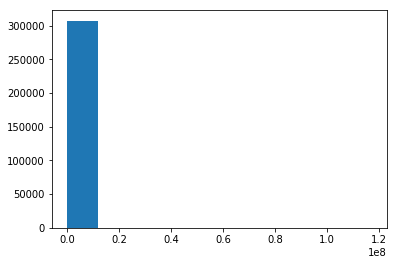

In [107]:
plt.hist(app_train['AMT_INCOME_TOTAL'])
plt.show()

In [106]:
#離群值，夭壽
app_train['AMT_INCOME_TOTAL'].max()

117000000.0

In [120]:
#計算zscore
z = np.abs(stats.zscore(app_train['AMT_INCOME_TOTAL']))

[0.14212925 0.42679193 0.4271961  0.14253343 0.19946596]


In [128]:
#取 zscore 在各區間的目標
income_zs_3 = app_train['AMT_INCOME_TOTAL'][(z < 3)]
income_zs_2 = app_train['AMT_INCOME_TOTAL'][(z < 2)]
income_zs_1 = app_train['AMT_INCOME_TOTAL'][(z < 1)]
income_zs_07 = app_train['AMT_INCOME_TOTAL'][(z < 0.7)]

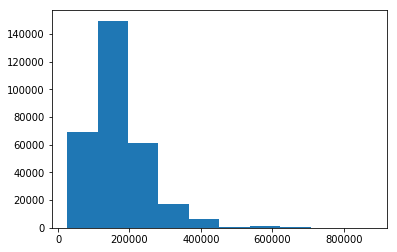

In [125]:
plt.hist(income_zs_3)
plt.show()

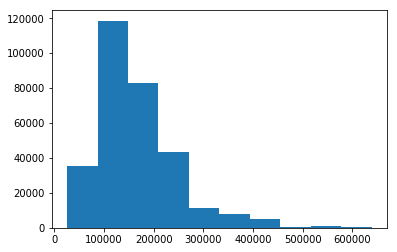

In [126]:
plt.hist(income_zs_2)
plt.show()

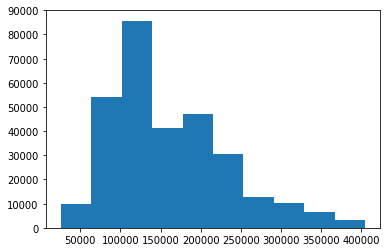

In [127]:
plt.hist(income_zs_1)
plt.show()

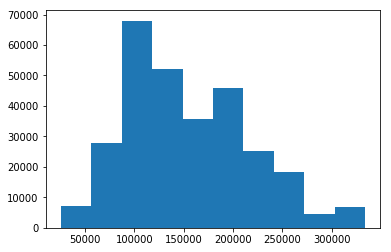

In [129]:
plt.hist(income_zs_07)
plt.show()

In [130]:
#看看去掉離群值後，資料的標準差
mean_zs_3 = app_train['AMT_INCOME_TOTAL'][(z < 3)].mean()
std_zs_3 = app_train['AMT_INCOME_TOTAL'][(z < 3)].std()

print('The mean of income of the client is $%d' % mean_zs_3)
print('The standard deviation of income of the client is $%d' % std_zs_3)

The mean of income of the client is $166688
The standard deviation of income of the client is $87576
